### 首先运行下基本的命令，检查下Tensorflow环境是否搭建成功

In [1]:
import tensorflow as tf

hello = tf.constant('Hello Tensorflow!')
with tf.Session() as sess:
    print(sess.run(hello))

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


b'Hello Tensorflow!'


### 模型初试

- 根据Capstone中给出例子[deep learning models for keras](https://github.com/fchollet/deep-learning-models)看了下其他人是如何使用Keras来预测的
- 选择VGG19,InceptionV3,Xception以及ResNet来根据上方的例子做一个简单的预测;
- 自定义一个函数根据不同的module name来预测，并输出图片及排名第一的概率；
- 测试图片我们选取训练集中的中的cat.1.jpg这张图片，这是一张虎斑猫的图片，英文为tabby

In [2]:
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
import h5py
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline


dogs = ['n02085620','n02085782','n02085936','n02086079'
        ,'n02086240','n02086646','n02086910','n02087046'
        ,'n02087394','n02088094','n02088238','n02088364'
        ,'n02088466','n02088632','n02089078','n02089867'
        ,'n02089973','n02090379','n02090622','n02090721'
        ,'n02091032','n02091134','n02091244','n02091467'
        ,'n02091635','n02091831','n02092002','n02092339'
        ,'n02093256','n02093428','n02093647','n02093754'
        ,'n02093859','n02093991','n02094114','n02094258'
        ,'n02094433','n02095314','n02095570','n02095889'
        ,'n02096051','n02096177','n02096294','n02096437'
        ,'n02096585','n02097047','n02097130','n02097209'
        ,'n02097298','n02097474','n02097658','n02098105'
        ,'n02098286','n02098413','n02099267','n02099429'
        ,'n02099601','n02099712','n02099849','n02100236'
        ,'n02100583','n02100735','n02100877','n02101006'
        ,'n02101388','n02101556','n02102040','n02102177'
        ,'n02102318','n02102480','n02102973','n02104029'
        ,'n02104365','n02105056','n02105162','n02105251'
        ,'n02105412','n02105505','n02105641','n02105855'
        ,'n02106030','n02106166','n02106382','n02106550'
        ,'n02106662','n02107142','n02107312','n02107574'
        ,'n02107683','n02107908','n02108000','n02108089'
        ,'n02108422','n02108551','n02108915','n02109047'
        ,'n02109525','n02109961','n02110063','n02110185'
        ,'n02110341','n02110627','n02110806','n02110958'
        ,'n02111129','n02111277','n02111500','n02111889'
        ,'n02112018','n02112137','n02112350','n02112706'
        ,'n02113023','n02113186','n02113624','n02113712'
        ,'n02113799','n02113978']

cats=['n02123045','n02123159','n02123394','n02123597','n02124075','n02125311','n02127052']

def preditcByModuleName(module_name, image_path):
    model = None
    preprocess = imagenet_utils.preprocess_input # default  preprocess
    input_shape = (224, 224) # default shape
    x_coordinate = 220
    # 根据module name选择构建的模型及input shape和preprocessor
    if(module_name == 'vgg19'):
        model = VGG19(weights='imagenet')
    elif(module_name == 'vgg16'):
        model = VGG16(weights='imagenet')
    elif(module_name == 'resnet'):
        model = ResNet50(weights='imagenet')
    elif(module_name == 'xception'):
        model = Xception(weights='imagenet')
        input_shape = (299, 299)
        preprocess = xception.preprocess_input
        x_coordinate = 190
    elif(module_name == 'inception'):
        model = InceptionV3(weights='imagenet')
        input_shape = (299, 299)
        preprocess = inception_v3.preprocess_input
        x_coordinate = 190
    else:
        raise ValueError("Module name is not correct!")
    
    # 加载图片并对数据进行预处理    
    img = load_img(image_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess(x)
    # 预测图片
    preds = model.predict(x)
    P = imagenet_utils.decode_predictions(preds, top=10)
    print(P)
    # 合成图片和预测结果并输出
    orig = cv2.imread(image_path)
    (imagenetID, label, prob) = P[0][0]
    cv2.putText(orig, "{}".format(module_name),(x_coordinate, 270), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),(10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    cv_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

Using TensorFlow backend.


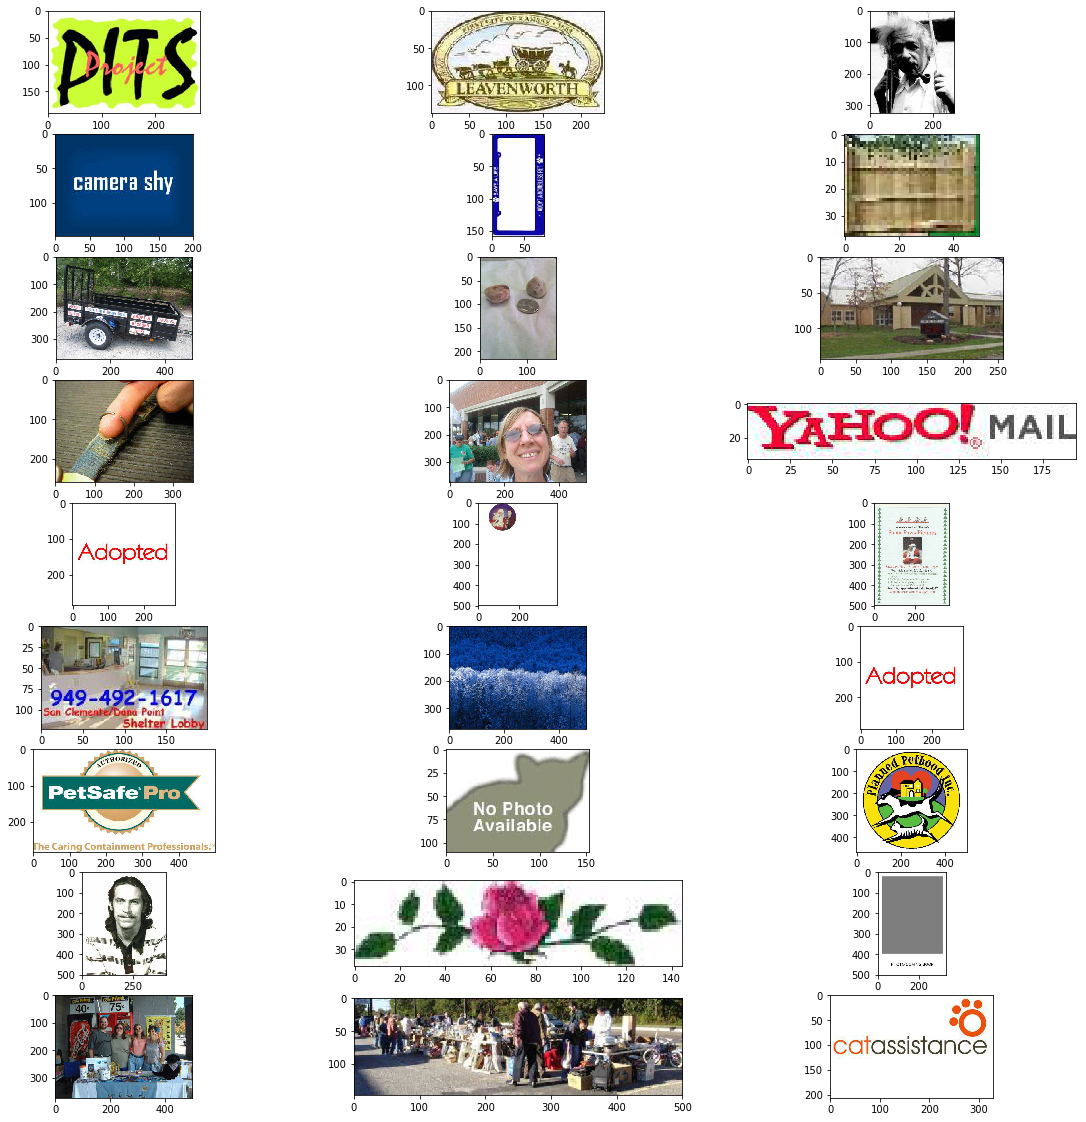

In [29]:
dogs = ['data/train/noise_dog/dog.10237.jpg','data/train/noise_dog/dog.11299.jpg',
        'data/train/noise_dog/dog.1773.jpg','data/train/noise_dog/dog.5604.jpg',
        'data/train/noise_dog/dog.9517.jpg','data/train/noise_dog/dog.10747.jpg',
        'data/train/noise_dog/dog.1194.jpg','data/train/noise_dog/dog.2614.jpg',
        'data/train/noise_dog/dog.6475.jpg','data/train/noise_dog/dog.10801.jpg',
        'data/train/noise_dog/dog.12376.jpg','data/train/noise_dog/dog.4367.jpg',
        'data/train/noise_dog/dog.8736.jpg']

cats = ['data/train/noise_cat/cat.10029.jpg','data/train/noise_cat/cat.12272.jpg',
        'data/train/noise_cat/cat.4338.jpg','data/train/noise_cat/cat.5418.jpg',
        'data/train/noise_cat/cat.8456.jpg','data/train/noise_cat/cat.10712.jpg',
        'data/train/noise_cat/cat.3216.jpg','data/train/noise_cat/cat.4688.jpg',
        'data/train/noise_cat/cat.7377.jpg','data/train/noise_cat/cat.9171.jpg',
        'data/train/noise_cat/cat.11184.jpg','data/train/noise_cat/cat.3672.jpg',
        'data/train/noise_cat/cat.5351.jpg','data/train/noise_cat/cat.7564.jpg']

all_noise_images = np.concatenate((dogs, cats), axis=0)
fig, axes = plt.subplots(9, 3, figsize=(20, 20))
file_index = 0
for row in range(0, 9):
    for col in range(0, 3):
        orig = cv2.imread(all_noise_images[file_index])
        cv_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
        axes[row][col].imshow(cv_rgb)
        file_index += 1
plt.show()

In [4]:
# 根据图片路径，模型等，返回前十的预测
def predict_top_20(image_path, model, input_shape, preprocess):    
    # load image and do preprocess
    img = load_img(image_path, target_size=input_shape)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess(x)
    # predict and return decoded predictions
    preds = model.predict(x)
    return imagenet_utils.decode_predictions(preds, top=20)

In [7]:
model = Xception(weights='imagenet') # load model
preds = predict_top_20('data/train/cat/cat.221.jpg', model, (299,299), xception.preprocess_input)
print(preds)

[[('n02101006', 'Gordon_setter', 0.2073661), ('n02094433', 'Yorkshire_terrier', 0.07601299), ('n02097658', 'silky_terrier', 0.055583026), ('n02096051', 'Airedale', 0.028108358), ('n02096294', 'Australian_terrier', 0.025686529), ('n02107683', 'Bernese_mountain_dog', 0.02364493), ('n02094114', 'Norfolk_terrier', 0.021668298), ('n02094258', 'Norwich_terrier', 0.013563771), ('n02443484', 'black-footed_ferret', 0.011008521), ('n02105855', 'Shetland_sheepdog', 0.009561035), ('n02106550', 'Rottweiler', 0.0070179617), ('n02112706', 'Brabancon_griffon', 0.0066452655), ('n02445715', 'skunk', 0.0060916524), ('n02100877', 'Irish_setter', 0.0060752714), ('n02443114', 'polecat', 0.0053223423), ('n02093754', 'Border_terrier', 0.0047085215), ('n04040759', 'radiator', 0.0044824625), ('n02097298', 'Scotch_terrier', 0.0044547617), ('n02100735', 'English_setter', 0.0040359152), ('n02481823', 'chimpanzee', 0.003917235)]]


In [4]:
# 判断前十中是否有预测值在对应的标签中
def is_any_matched_labels(pred, labels):
    for i in range(len(pred[0])): 
        if any(pred[0][i][0] in s for s in labels):
            return True
    return False

In [ ]:
# 查找异常图片
def find_noise_image(Model, image_type, number):
    image_path = 'data/train/'
    labels = []
    noise_images = []
    model = Model(weights='imagenet') # load model
    if(image_type == 'cat'):
        image_path = image_path + 'cat/cat.{}.jpg'
        labels = cats
    elif(image_tpye == 'dog'):
        image_path = image_path + 'dog/dog.{}.jpg'
        labels = dogs
    else:
        raise ValueError("image type is not correct!")
    
    for i in range(1, number+1):
        cur_image_path = image_path.format(i)
        preds = predict_top_10(cur_image_path, model, (299,299), xception.preprocess_input)
        is_match = is_any_matched_labels(preds, labels)
        # if not match record image path
        if (is_match):
            pass
            #print("image:{} matched type {}".format(cur_image_path, image_type))
        else:
            print("image:{} not matched type {}".format(cur_image_path, image_type))
            noise_images.append(cur_image_path)
    return noise_images

start_time = time.time()
noise_images = find_noise_image(Xception, 'cat', 12500)
consumed_time = time.time() - start_time
print("Found noise images: {} and consumed time {:.2f} seconds".format(noise_images, consumed_time))

image:data/train/cat/cat.221.jpg not matched type cat
image:data/train/cat/cat.252.jpg not matched type cat
image:data/train/cat/cat.372.jpg not matched type cat
image:data/train/cat/cat.503.jpg not matched type cat
image:data/train/cat/cat.519.jpg not matched type cat
image:data/train/cat/cat.587.jpg not matched type cat
image:data/train/cat/cat.599.jpg not matched type cat
image:data/train/cat/cat.724.jpg not matched type cat
image:data/train/cat/cat.883.jpg not matched type cat
image:data/train/cat/cat.933.jpg not matched type cat
image:data/train/cat/cat.1282.jpg not matched type cat
image:data/train/cat/cat.1741.jpg not matched type cat
image:data/train/cat/cat.2150.jpg not matched type cat
image:data/train/cat/cat.2279.jpg not matched type cat
image:data/train/cat/cat.2337.jpg not matched type cat
image:data/train/cat/cat.2429.jpg not matched type cat
image:data/train/cat/cat.2433.jpg not matched type cat
image:data/train/cat/cat.2457.jpg not matched type cat
image:data/train/cat

In [ ]:
# Test vgg19
img_path = 'data/train/cat/cat.1.jpg'
preditcByModuleName('vgg16', img_path)

[[('n02123045', 'tabby', 0.69066197), ('n02123159', 'tiger_cat', 0.18331043), ('n02124075', 'Egyptian_cat', 0.088598765), ('n02127052', 'lynx', 0.0072210864), ('n02971356', 'carton', 0.0028245447)]]


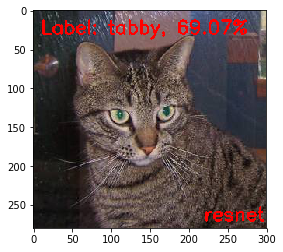

In [4]:
# Test ResNet
preditcByModuleName('resnet', img_path)

[[('n02123045', 'tabby', 0.85520023), ('n02123159', 'tiger_cat', 0.100701936), ('n02124075', 'Egyptian_cat', 0.04354258), ('n02127052', 'lynx', 5.11094e-05), ('n04589890', 'window_screen', 1.1552173e-05)]]


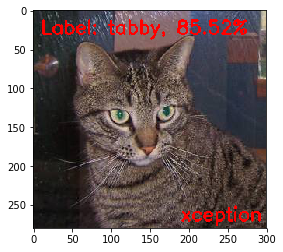

In [5]:
# Test xception
preditcByModuleName('xception', img_path)

[[('n02123045', 'tabby', 0.9747243), ('n02123159', 'tiger_cat', 0.01964754), ('n02124075', 'Egyptian_cat', 0.0056187846), ('n02127052', 'lynx', 3.6070317e-06), ('n04367480', 'swab', 5.431778e-07)]]


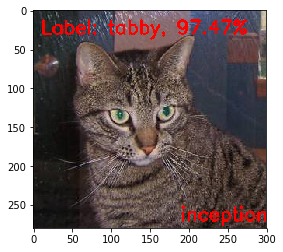

In [6]:
# Test Inception
preditcByModuleName('inception', img_path)

- 第一轮比拼结束，vgg19垫底，inception拔得头筹！下面我们再试一张狗狗的图片
- 测试图片选取训练集中的dog.26.jpg，从文字中可以看出是澳洲牧羊犬，英文为cattle

[[('n02091244', 'Ibizan_hound', 0.24142145), ('n02105412', 'kelpie', 0.22413577), ('n02105162', 'malinois', 0.11064881), ('n02115641', 'dingo', 0.09932012), ('n02090379', 'redbone', 0.048726052)]]


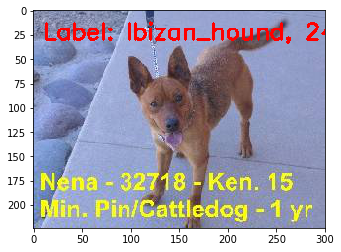

In [4]:
img_path = 'data/train/dog/dog.26.jpg'
preditcByModuleName('vgg19', img_path)

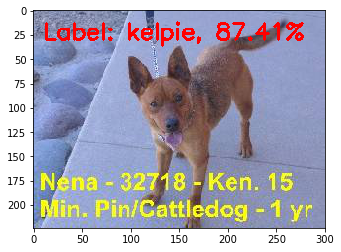

In [18]:
# Test ResNet
preditcByModuleName('resnet', img_path)

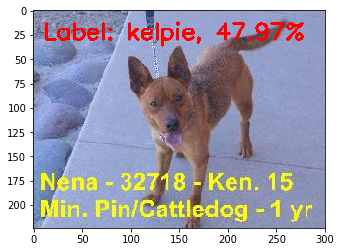

In [19]:
# Test xception
preditcByModuleName('xception', img_path)

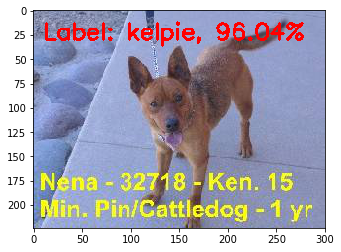

In [20]:
# Test Inception
preditcByModuleName('inception', img_path)

- 第二轮比拼结束，所有预测全部错误，vgg19错的比较远
- 其他预测kelpie的为澳大利亚卡尔比犬，我看了下图片二者确实比较相似，主要区别是身上的斑纹
- 至此简单尝试下模型预测已经完成
- 尝试的主要目的有验证下本地环境是否基本OK
- 粗略的了解下各个模型的表现，有个第一眼的印象
- 因为VGG19年代相对其他模型比较久远，表现相对较差，我们战略性的放弃这个模型。